Dataset not found. Generating synthetic data...
Statistical Summary:
                       mean       std       min        max
fixed_acidity     8.028998  1.468824  3.138099  13.779097
volatile_acidity  0.507084  0.099745  0.205961   0.819311
citric_acid       0.300583  0.098345 -0.001951   0.692624
residual_sugar    2.481281  1.027133 -0.429449   5.743093
chlorides         0.079015  0.019848  0.016466   0.142258
quality           5.469000  1.743008  3.000000   8.000000


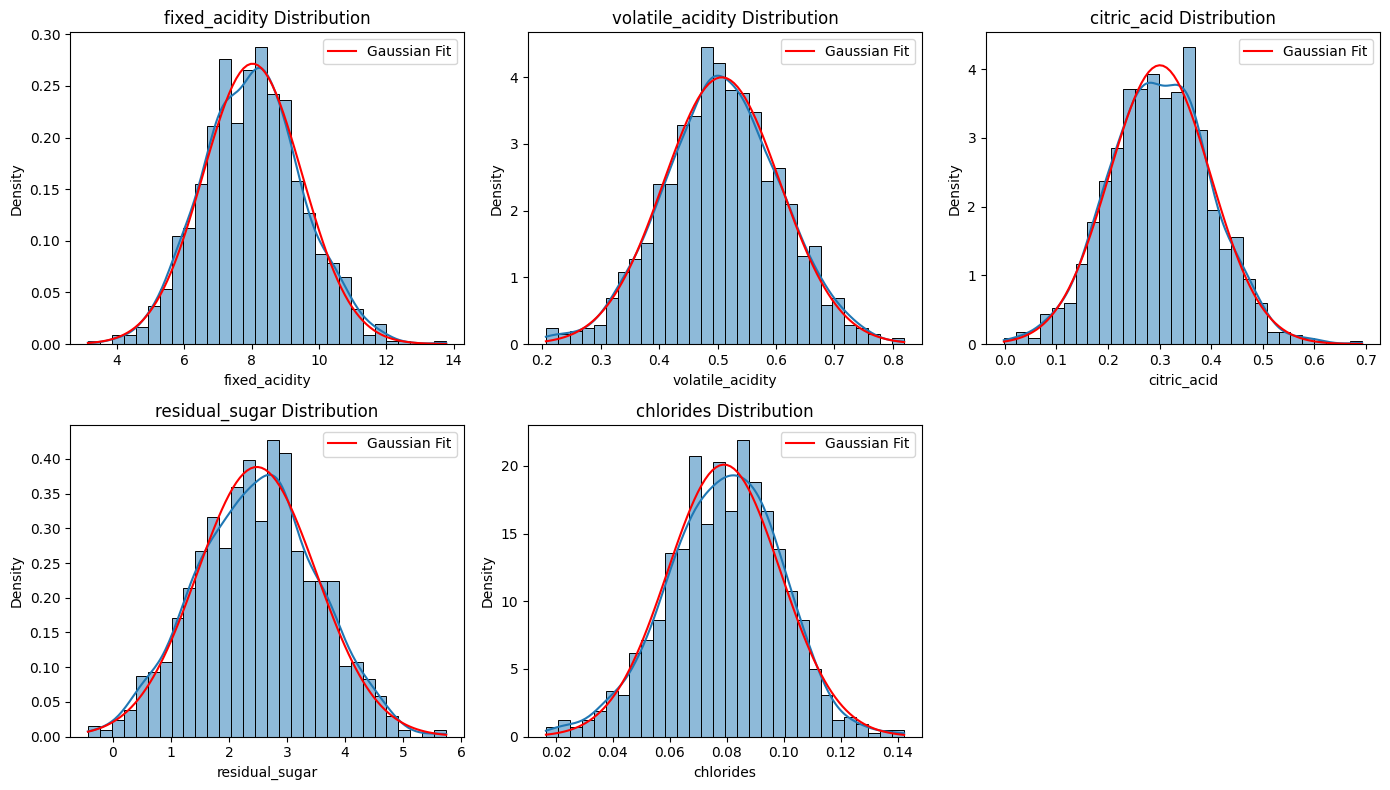

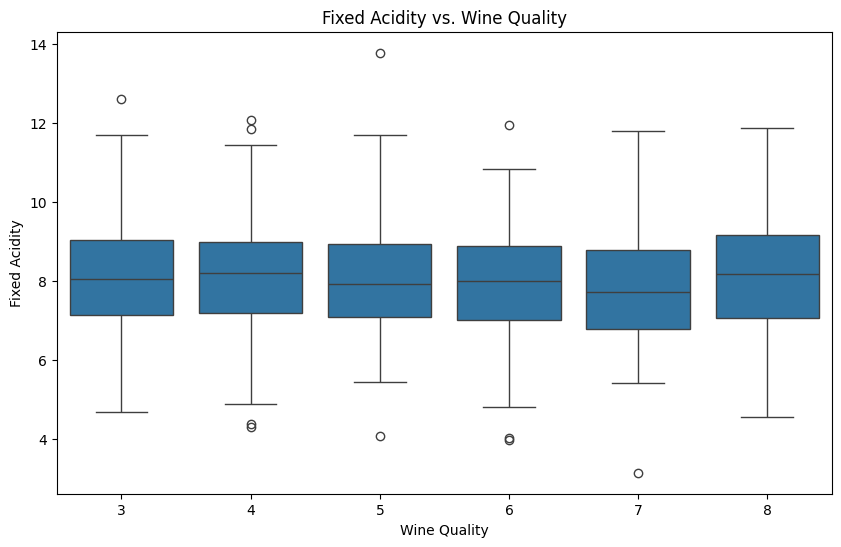

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# --------------------------------------
# Generate synthetic data if dataset not found
def generate_synthetic_data(n=1000):
    np.random.seed(42)
    data = {
        'fixed_acidity': np.random.normal(8, 1.5, n),
        'volatile_acidity': np.random.normal(0.5, 0.1, n),
        'citric_acid': np.random.normal(0.3, 0.1, n),
        'residual_sugar': np.random.normal(2.5, 1.0, n),
        'chlorides': np.random.normal(0.08, 0.02, n),
        'quality': np.random.randint(3, 9, n)
    }
    return pd.DataFrame(data)

# --------------------------------------
# Load dataset or generate synthetic data
try:
    wine_data = pd.read_csv("winequality-red.csv")  # Use real dataset if available
except FileNotFoundError:
    print("Dataset not found. Generating synthetic data...")
    wine_data = generate_synthetic_data()

# --------------------------------------
# Display statistical summary
statistics = wine_data.describe().T[['mean', 'std', 'min', 'max']]
print("Statistical Summary:\n", statistics)

# --------------------------------------
# Plot histograms with Gaussian fits
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides']
plt.figure(figsize=(14, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(wine_data[feature], kde=True, stat='density', bins=30)
    
    # Gaussian curve
    mu, sigma = wine_data[feature].mean(), wine_data[feature].std()
    x = np.linspace(wine_data[feature].min(), wine_data[feature].max(), 100)
    plt.plot(x, norm.pdf(x, mu, sigma), color='red', label='Gaussian Fit')
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

# --------------------------------------
# Boxplot: Feature vs. Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='fixed_acidity', data=wine_data)
plt.title('Fixed Acidity vs. Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Fixed Acidity')
plt.show()
